In [1]:
import pandas as pd

In [2]:
url = 'https://github.com/Fllarpell/energy_india_analysis/blob/main/dataset_tk.csv?raw=true'
data = pd.read_csv(url)
data.head()

,Unnamed: 0,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
0,02/01/2019 00:00:00,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,...,70.2,108.2,2.0,2.1,21.7,2.7,6.1,1.9,2.2,3.4
1,03/01/2019 00:00:00,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,...,67.9,110.2,1.9,2.2,23.4,2.4,6.5,1.8,2.2,3.6
2,04/01/2019 00:00:00,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,4.8,...,66.3,106.8,1.7,2.2,21.7,2.4,6.3,1.7,2.2,3.5
3,05/01/2019 00:00:00,121.0,127.5,239.1,79.2,299.0,39.2,30.2,51.5,4.3,...,65.8,107.0,2.0,2.2,22.5,2.7,5.7,1.8,2.3,3.5
4,06/01/2019 00:00:00,121.4,132.6,240.4,76.6,286.8,39.2,31.0,53.2,4.3,...,62.9,106.4,2.0,2.2,21.7,2.7,6.2,1.9,2.3,3.3


In [3]:
data.rename(columns={"Unnamed: 0": "Date"}, inplace=True)
data["Date"] = pd.to_datetime(data["Date"], format="%d/%m/%Y %H:%M:%S")

descriptive_stats = data.describe()
descriptive_stats

,Date,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
count,503,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,...,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000
mean,2019-09-25 13:27:18.966202880,141.145527,138.333598,218.443340,83.380716,314.036382,36.157058,26.568191,44.264016,4.141551,...,80.464612,138.708151,1.289463,2.109145,24.960040,2.494632,5.643738,1.706362,2.162425,4.085487
min,2019-01-02 00:00:00,56.100000,64.800000,105.800000,41.800000,186.800000,16.800000,11.800000,17.800000,2.200000,...,51.100000,51.500000,0.300000,1.100000,12.200000,1.500000,3.300000,1.200000,1.400000,1.400000
25%,2019-05-11 12:00:00,104.000000,114.800000,205.800000,63.500000,263.650000,33.800000,25.600000,41.550000,3.300000,...,71.650000,114.650000,1.100000,2.000000,22.100000,2.400000,5.300000,1.600000,2.100000,3.500000
50%,2019-09-12 00:00:00,118.300000,126.800000,222.900000,72.700000,290.000000,37.000000,28.000000,44.100000,3.800000,...,79.800000,131.200000,1.200000,2.200000,23.500000,2.500000,5.800000,1.700000,2.200000,3.900000
75%,2020-01-25 12:00:00,162.500000,158.100000,237.600000,105.800000,370.550000,40.350000,29.700000,47.350000,4.900000,...,88.400000,164.750000,1.400000,2.200000,27.600000,2.600000,6.100000,1.800000,2.200000,4.600000
max,2020-12-05 00:00:00,300.000000,237.200000,278.000000,147.100000,471.800000,53.200000,34.000000,54.200000,7.400000,...,113.000000,198.500000,2.800000,2.700000,38.000000,3.200000,6.900000,2.200000,2.700000,6.600000
std,NaN,56.977361,38.106593,27.421615,25.915357,66.516960,6.705108,4.807040,4.769391,1.143422,...,10.905131,27.849180,0.363565,0.231132,4.732684,0.223141,0.717257,0.144760,0.145174,0.751047


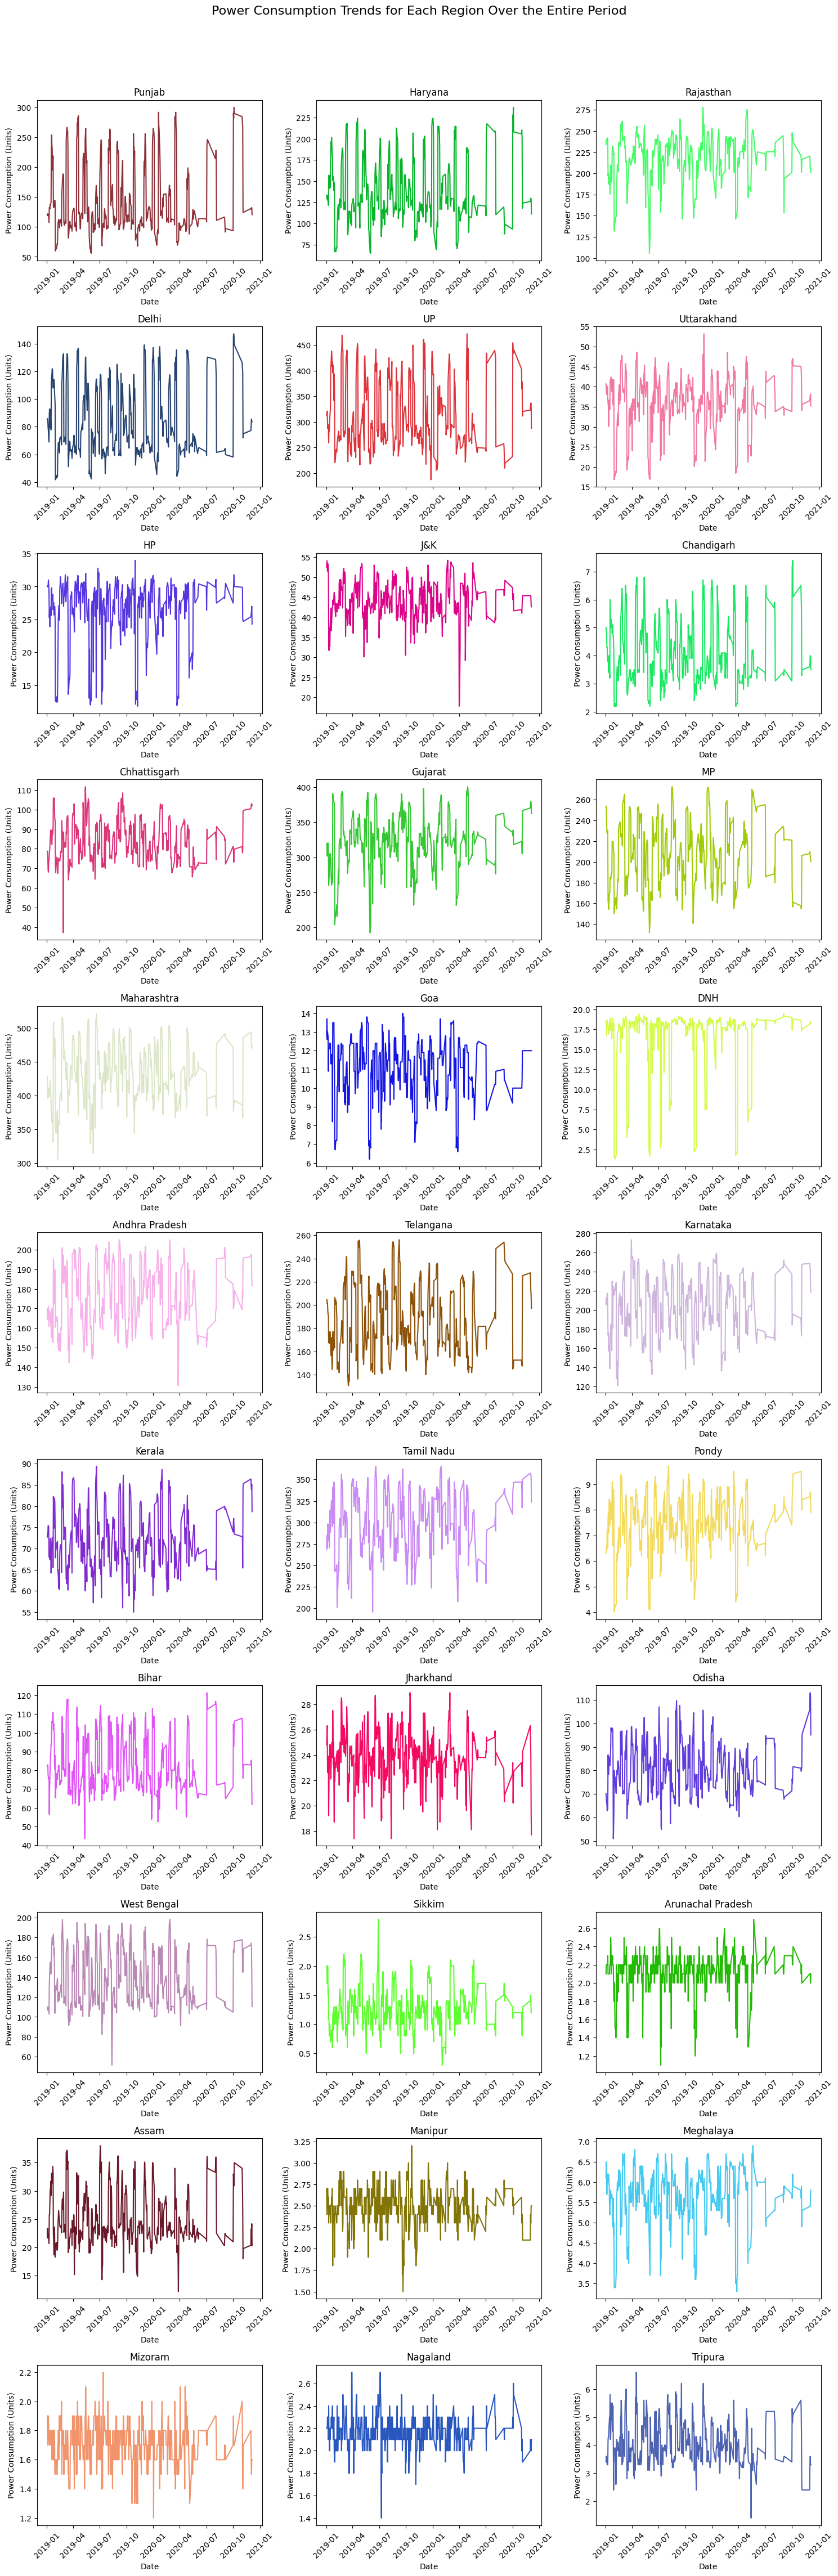

In [4]:
import numpy as np
import matplotlib.pyplot as plt

regions = data.columns[1:]

num_regions = len(regions)
rows = (num_regions // 3) + 1

plt.figure(figsize=(15, rows * 4))

for i, region in enumerate(regions):
    plt.subplot(rows, 3, i+1)
    plt.plot(data['Date'], data[region], label=region, color=np.random.rand(3,))
    plt.title(region)
    plt.xlabel('Date')
    plt.ylabel('Power Consumption (Units)')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.suptitle('Power Consumption Trends for Each Region Over the Entire Period', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

In [20]:
outliers = {}

for region in regions:
    # Calculate min boundary and max boundary of the outliers with dates
    # Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = data[region].quantile(0.25)
    Q3 = data[region].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers[region] = data[(data[region] < lower_bound) | (data[region] > upper_bound)][['Date', region]]

for region, outlier_data in outliers.items():
    if not outlier_data.empty:
        print(f"Outliers in {region}: \n", outlier_data)
    else:
        print(f"No significant outliers in {region}")
outliers

Outliers in Punjab: 
           Date  Punjab
15  2019-01-17   253.8
64  2019-03-09   256.7
65  2019-03-10   265.3
66  2019-03-11   266.5
67  2019-03-12   257.9
68  2019-03-13   260.3
99  2019-04-14   250.6
100 2019-04-15   274.1
101 2019-04-16   269.4
102 2019-04-17   282.7
103 2019-04-18   281.5
104 2019-04-19   286.0
127 2019-05-13   253.7
128 2019-05-14   264.8
215 2019-08-05   263.8
216 2019-08-06   259.3
293 2019-10-25   256.1
332 2019-12-04   256.0
357 2019-12-30   251.9
358 2019-12-31   255.0
359 2020-01-01   264.6
360 2020-01-02   259.7
361 2020-01-03   259.0
370 2020-01-19   291.7
371 2020-01-20   268.9
372 2020-01-21   262.6
412 2020-03-15   284.4
413 2020-03-16   271.4
414 2020-03-17   270.0
415 2020-03-18   291.7
416 2020-03-19   268.9
417 2020-03-20   262.6
489 2020-10-02   290.1
490 2020-10-03   282.1
491 2020-10-04   300.0
492 2020-10-05   289.9
493 2020-11-01   284.4
494 2020-11-02   271.4
495 2020-11-03   270.0
Outliers in Haryana: 
           Date  Haryana
103 2019-04

{'Punjab':           Date  Punjab
 15  2019-01-17   253.8
 64  2019-03-09   256.7
 65  2019-03-10   265.3
 66  2019-03-11   266.5
 67  2019-03-12   257.9
 68  2019-03-13   260.3
 99  2019-04-14   250.6
 100 2019-04-15   274.1
 101 2019-04-16   269.4
 102 2019-04-17   282.7
 103 2019-04-18   281.5
 104 2019-04-19   286.0
 127 2019-05-13   253.7
 128 2019-05-14   264.8
 215 2019-08-05   263.8
 216 2019-08-06   259.3
 293 2019-10-25   256.1
 332 2019-12-04   256.0
 357 2019-12-30   251.9
 358 2019-12-31   255.0
 359 2020-01-01   264.6
 360 2020-01-02   259.7
 361 2020-01-03   259.0
 370 2020-01-19   291.7
 371 2020-01-20   268.9
 372 2020-01-21   262.6
 412 2020-03-15   284.4
 413 2020-03-16   271.4
 414 2020-03-17   270.0
 415 2020-03-18   291.7
 416 2020-03-19   268.9
 417 2020-03-20   262.6
 489 2020-10-02   290.1
 490 2020-10-03   282.1
 491 2020-10-04   300.0
 492 2020-10-05   289.9
 493 2020-11-01   284.4
 494 2020-11-02   271.4
 495 2020-11-03   270.0,
 'Haryana':           Date  H

In [19]:
yearly_min_max_avg_outliers = {}

data['Year'] = data['Date'].dt.year

for year in data['Year'].unique():
    yearly_min_max_avg_outliers[year] = {}
    data_year = data[data['Year'] == year]

    for region in regions:
        Q1 = data_year[region].quantile(0.25)
        Q3 = data_year[region].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outlier_data = data_year[(data_year[region] < lower_bound) | (data_year[region] > upper_bound)][['Date', region]]

        if not outlier_data.empty:
            min_outlier = outlier_data[region].min()
            max_outlier = outlier_data[region].max()
            avg_outlier = outlier_data[region].mean()

            min_outlier_date = outlier_data[outlier_data[region] == min_outlier]['Date'].values[0]
            max_outlier_date = outlier_data[outlier_data[region] == max_outlier]['Date'].values[0]

            yearly_min_max_avg_outliers[year][region] = {
                'min_outlier': min_outlier,
                'min_outlier_date': min_outlier_date,
                'max_outlier': max_outlier,
                'max_outlier_date': max_outlier_date,
                'avg_outlier': avg_outlier
            }
        else:
            yearly_min_max_avg_outliers[year][region] = {
                'min_outlier': None,
                'min_outlier_date': None,
                'max_outlier': None,
                'max_outlier_date': None,
                'avg_outlier': None
            }

yearly_min_max_avg_outliers

{2019: {'Punjab': {'min_outlier': 231.9,
   'min_outlier_date': numpy.datetime64('2019-01-16T00:00:00.000000000'),
   'max_outlier': 286.0,
   'max_outlier_date': numpy.datetime64('2019-04-19T00:00:00.000000000'),
   'avg_outlier': 251.8666666666667},
  'Haryana': {'min_outlier': 218.3,
   'min_outlier_date': numpy.datetime64('2019-03-13T00:00:00.000000000'),
   'max_outlier': 224.5,
   'max_outlier_date': numpy.datetime64('2019-04-18T00:00:00.000000000'),
   'avg_outlier': 220.6142857142857},
  'Rajasthan': {'min_outlier': 105.8,
   'min_outlier_date': numpy.datetime64('2019-05-31T00:00:00.000000000'),
   'max_outlier': 156.0,
   'max_outlier_date': numpy.datetime64('2019-10-29T00:00:00.000000000'),
   'avg_outlier': 140.44285714285712},
  'Delhi': {'min_outlier': None,
   'min_outlier_date': None,
   'max_outlier': None,
   'max_outlier_date': None,
   'avg_outlier': None},
  'UP': {'min_outlier': None,
   'min_outlier_date': None,
   'max_outlier': None,
   'max_outlier_date': None,